# Soluzione Equazione oscillatore smorzato

L'equazione è:
$$
\begin{cases}
 y''+2\gamma y'+\omega_0 y=f(y,y',t) \\
 y'(0)=v_0 \\
 y(0)=y_0 
\end{cases}
$$
Metodo di soluzione: Verlet Velocity
$$ x_{n+1}=x_n+v_n h+\frac{h^2}{2}a(x_n,v_n,t_n)$$
$$ v_{n+1}=v_n+\frac{h}{2}(a(x_{n+1}+a_n) $$

Metodo di soluzione RK2:$$
\begin{cases}
 k_1=hv_n \\
 w_1=h f(x_n,v_n,t_n)\\ 
 k_2=h(x_n+\frac{k_1}{2})\\ 
 w_2=hf(x_n+\frac{k_1}{2},v_n+\frac{w_1}{2},t_h +\frac{h}{2})
 \end{cases}$$

$$
\begin{cases}
x_{n+1}=x_n+k_2 \\
v_{n+1}=v_n+w_2
\end{cases}$$


In [96]:
import numpy as np
import matplotlib.pyplot as plt

time=200
dt=0.001
f=20
N=time/dt
a=int(N/f)


In [97]:
def RK2_solve(x0,v0,gamma,w0):
    
    #y=np.array([0])
    #v=np.array([0])
    y=np.zeros(a+1)
    v=np.zeros(a+1)
    
    #t_frames=np.array([0])
    t_frames=np.zeros(a+1)
    
    def Forzante(yn,vn,tn):
        return (5*np.sin(w0*tn),0)
    
    def acc(yn,vn,tn):
        return -2*gamma*vn-w0**2*yn+Forzante(yn,vn,tn)[0]
    
    y[0]=x0
    v[0]=v0

    yn=y[0]
    vn=v[0]
    cf=1
    n=1
    
    for t in np.arange(0,time,dt):
        
        
        k1=dt*vn
        w1=dt*acc(yn,vn,t)
        k2=dt*(vn+w1*0.5)
        w2=dt*acc(yn+k1*0.5,vn+w1*0.5,t+0.5*dt)
        
        ynew=yn+k2
        vnew=vn+w2
        
        vn=vnew
        yn=ynew
        
        if n%f==0:
            y[cf]=ynew
            v[cf]=vnew
            t_frames[cf]=t
            cf+=1
            #y=np.append(y,ynew)
            #v=np.append(v,vnew)
            #t_frames=np.append(t_frames,t)
            
        n+=1
        
    return (y,v,t_frames)

        
        


In [98]:
%%time
y,v,t=RK2_solve(10,100,5,1)


CPU times: user 1.63 s, sys: 3.93 ms, total: 1.63 s
Wall time: 1.63 s


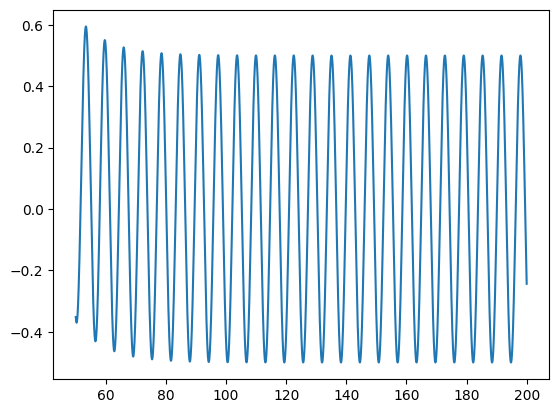

In [99]:
plt.plot(t[t>50],y[t>50])


In [100]:
%%time
y,v,t=RK2_solve(10,100,5,1)

CPU times: user 1.54 s, sys: 10 µs, total: 1.54 s
Wall time: 1.54 s


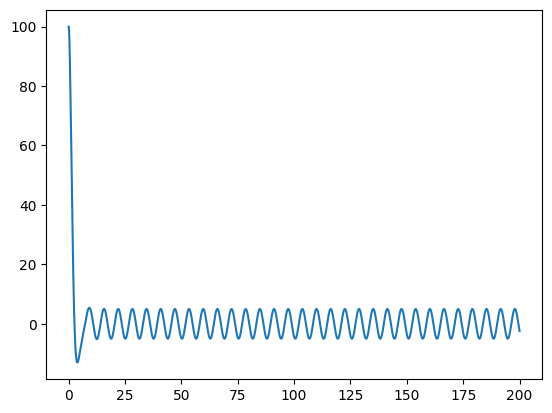

In [102]:
y,v,t=RK2_solve(100,2,0.5,1)
plt.plot(t,y)


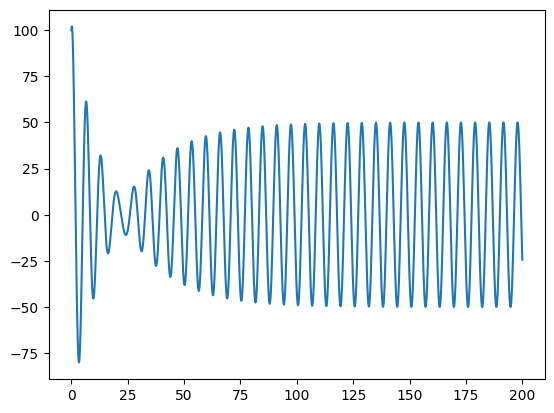

In [111]:
y,v,t=RK2_solve(100,20,0.05,1)
plt.plot(t,y)